In [26]:
import pyrealsense2 as rs
import numpy as np
import cv2
import matplotlib.pyplot as plt
from realsense_depth import *

ModuleNotFoundError: No module named 'realsense_depth'

In [21]:
# Configure depth and color streams
pipeline = rs.pipeline()
config = rs.config()

# Get device product line for setting a supporting resolution
pipeline_wrapper = rs.pipeline_wrapper(pipeline)
pipeline_profile = config.resolve(pipeline_wrapper)
device = pipeline_profile.get_device()
device_product_line = str(device.get_info(rs.camera_info.product_line))

found_rgb = False
for s in device.sensors:
    if s.get_info(rs.camera_info.name) == 'RGB Camera':
        found_rgb = True
        break
if not found_rgb:
    print("The demo requires Depth camera with Color sensor")
    exit(0)

config.enable_stream(rs.stream.depth, 1280, 720, rs.format.z16, 30)

if device_product_line == 'L500':
    config.enable_stream(rs.stream.color, 960, 540, rs.format.bgr8, 30)
else:
    config.enable_stream(rs.stream.color, 1280, 720, rs.format.bgr8, 30)

# Start streaming
pipeline.start(config)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<pyrealsense2.frame BGR8 #1080 @1662110440460.134521>

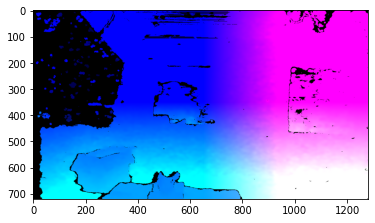

In [25]:
align = rs.align(rs.stream.depth)
pc = rs.pointcloud()
frames = pipeline.wait_for_frames()
aligned = align.process(frames)
color_aligned_to_depth = aligned.first(rs.stream.color)
depth_frame = frames.first(rs.stream.depth)
points = pc.calculate(depth_frame)
w = rs.video_frame(depth_frame).width
h = rs.video_frame(depth_frame).height
verts = np.asanyarray(points.get_vertices()).view(np.float32).reshape(h, w, 3)
verts.shape

plt.imshow(verts)
# plt.imshow(color_aligned_to_depth)
color_aligned_to_depth